In [ ]:
'''El Comité Olímpico Internacional ha recopilado información sobre el desempeño de atletas en diversas disciplinas 
a lo largo de los últimos juegos olímpicos. El objetivo es analizar patrones de rendimiento, identificar factores 
clave que influyen en el éxito de los atletas y realizar predicciones sobre el desempeño futuro.
El equipo de análisis de datos necesita que explores, transformes y modeles los datos para extraer información 
relevante sobre la relación entre características de los atletas (edad, altura, peso, entrenamientos semanales, país) 
y su desempeño en las competiciones.'''


           Atleta  Edad  Altura_cm  Peso_kg    Deporte  \
0      Usain Bolt    34        195       94  Atletismo   
1    Simone Biles    26        142       47   Gimnasia   
2  Michael Phelps    35        193       88   Natación   
3   Katie Ledecky    27        183       70   Natación   
4  Nadia Comaneci    45        160       50   Gimnasia   

   Entrenamientos_Semanales  Medallas_Totales     Pais  
0                         6                 8  Jamaica  
1                        10                 7   EE.UU.  
2                         9                23   EE.UU.  
3                         8                10   EE.UU.  
4                         7                 5  Rumania  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null     

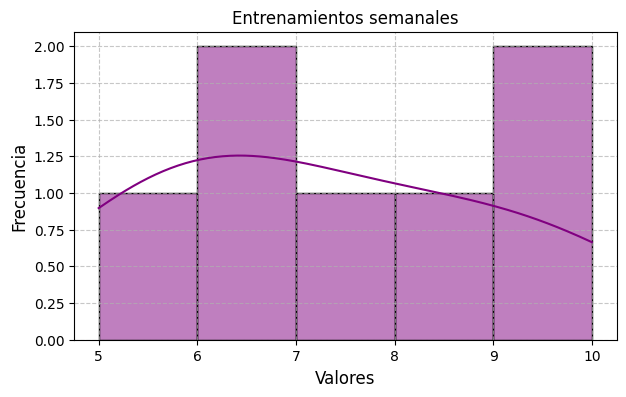

In [7]:

# 1. Análisis Exploratorio de Datos 
# Carga el dataset en un DataFrame de Pandas.
# Muestra las primeras 5 filas y usa .info() para obtener información sobre los datos.
# Calcula estadísticas descriptivas con .describe().


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

df = pd.read_csv('olimpicos.csv')
print(f'{df.head(5)}\n')
print(f'{df.info()}\n')
print(f'{df.describe()}\n')

# Genera un histograma del número de entrenamientos semanales.

plt.figure(figsize=(7,4))
sns.histplot(df['Entrenamientos_Semanales'], kde=True, color='Purple', bins= 5)
plt.title('Entrenamientos semanales')
plt.xlabel('Valores', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.grid(True, linestyle = '--', alpha= 0.7)    #cuadrículas para mejor visualización
#plt.tight_layout()
plt.show()



Media: 8.57
Mediana: 7.00
Moda: 3.00
Desviación estándar: 18.716


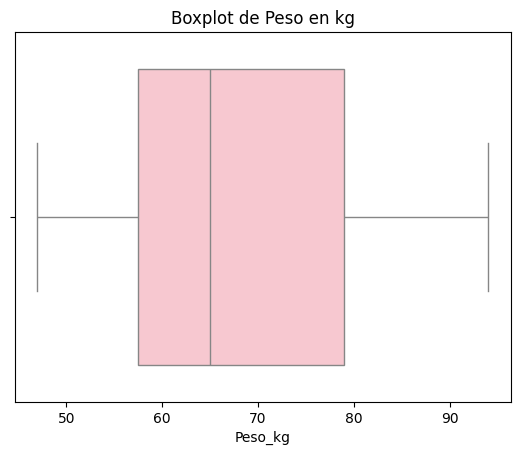

In [4]:
# 2. Estadística Descriptiva
# Determina el tipo de variable de cada columna.

 #   Column                            Tipo de Variable
# ---  ------                    --------------  ----- 
#  0   Atleta                       Categórica nominal
#  1   Edad                         Cuantitativa discreta
#  2   Altura_cm                    Cuantitativa continua
#  3   Peso_kg                      Cuantitativa continua
#  4   Deporte                      Categórica nominal
#  5   Entrenamientos_Semanales     Cuantitativa discreta
#  6   Medallas_Totales             Cuantitativa discreta
#  7   Pais                         Categórica nominal

# Calcula la media, mediana y moda de la cantidad de medallas obtenidas.

media = df['Medallas_Totales'].mean()
mediana = df['Medallas_Totales'].median()
moda = df['Medallas_Totales'].mode()[0]

print(f'Media: {media:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Moda: {moda:.2f}')


# Calcula la desviación estándar de la altura de los atletas.

categoria = df['Altura_cm']

desviacion_estandar = categoria.std()
print(f'Desviación estándar: {desviacion_estandar:.3f}')

# Identifica valores atípicos en la columna de peso utilizando un boxplot.

sns.boxplot(x=df['Peso_kg'], color='Pink')
plt.title("Boxplot de Peso en kg")
plt.show()

In [2]:
# 3. Análisis de Correlación
# Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.

# Correlación de Pearson
correlacion, p_valor = stats.pearsonr(df['Entrenamientos_Semanales'], df['Medallas_Totales'])
print(f"Correlación: {correlacion:.2f}, P-valor: {p_valor:.4f}\n")

# Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Peso_kg', y='Medallas_Totales', hue='Deporte', palette='tab10')
plt.title('Relación entre Peso y Medallas Totales')
plt.xlabel('Peso (kg)')
plt.ylabel('Medallas Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explica si existe correlación entre estas variables.

'''
Correlación: 0.57, P-valor: 0.1817
El coeficiente 0.57 indica una correlación positiva moderada, esto quiere decir que a mayor número de entrenamientos semanales, 
tiende a aumentar el número de medallas. Sin embargo, el valor p > 0.05 sugiere que la correlación no es estadísticamente significativa, 
probablemente debido a una muestra pequeña o dispersión.
'''

NameError: name 'stats' is not defined

In [ ]:
# 4. Regresión Lineal
# Implementa un modelo de regresión lineal para predecir el número de medallas obtenidas en función del número de entrenamientos semanales.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Variables independientes (X) y dependiente (y)
X = df[['Entrenamientos_Semanales']].values
y = df['Medallas_Totales'].values

# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)


# Obtén los coeficientes de regresión e interpreta el resultado.

pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f'β₀ (intercepto) {intercepto:.4f}')      # β₀ (intercepto) [-7.1250]
print(f'β₁ (pendiente) {pendiente:.4f}\n')      # β₁ (pendiente) [2.1544]

'''Interpretar resultado
No hay una correlación lineal en estos datos.
Esto significa que el número de entrenamientos semanales por sí solo no es un predictor muy fuerte de la cantidad de medallas, 
y hay muchos otros factores importantes que están fuera del modelo.
'''

# Calcula el R² para medir el ajuste del modelo.
# Predicciones y R²
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

print(f'\n Predicción: {y_pred}')
print(f'r2: {r2:.4f}')                  # r2: 0.325

'''
Matemáticamente, el modelo establece que el número de entrenamientos semanales explica el 32.47% de la variación en las medallas, 
y que cada entrenamiento adicional se asocia con una disminución de 7.1250 medallas. Sin embargo, desde una perspectiva práctica y 
lógica, este modelo es altamente problemático. La pendiente negativa es muy contraintuitiva para el contexto deportivo, y el r2  
moderado sugiere que el modelo es incompleto y que el número de entrenamientos por sí solo no es un predictor robusto ni lógico del éxito olímpico.
'''

# Usa Seaborn (regplot) para graficar la regresión lineal.

plt.figure(figsize=(8, 6))
sns.regplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df, ci=None, color='green')
plt.title('Regresión Lineal: Entrenamientos Semanales vs Medallas Totales')
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Medallas Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

(pendiente, intercepto, r2)



NameError: name 'df' is not defined

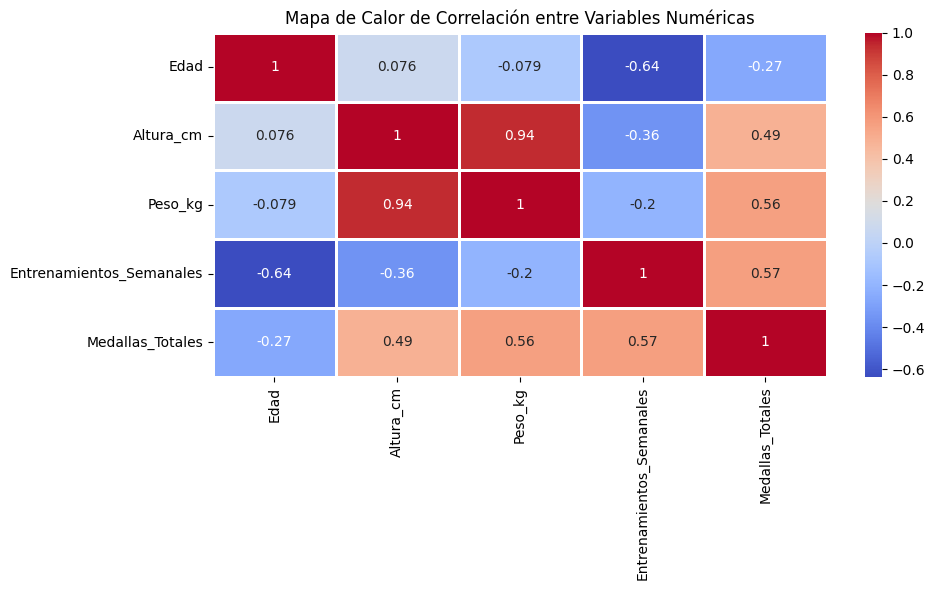

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13536\3513434982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deporte', y='Medallas_Totales', data=df, palette='Set2')


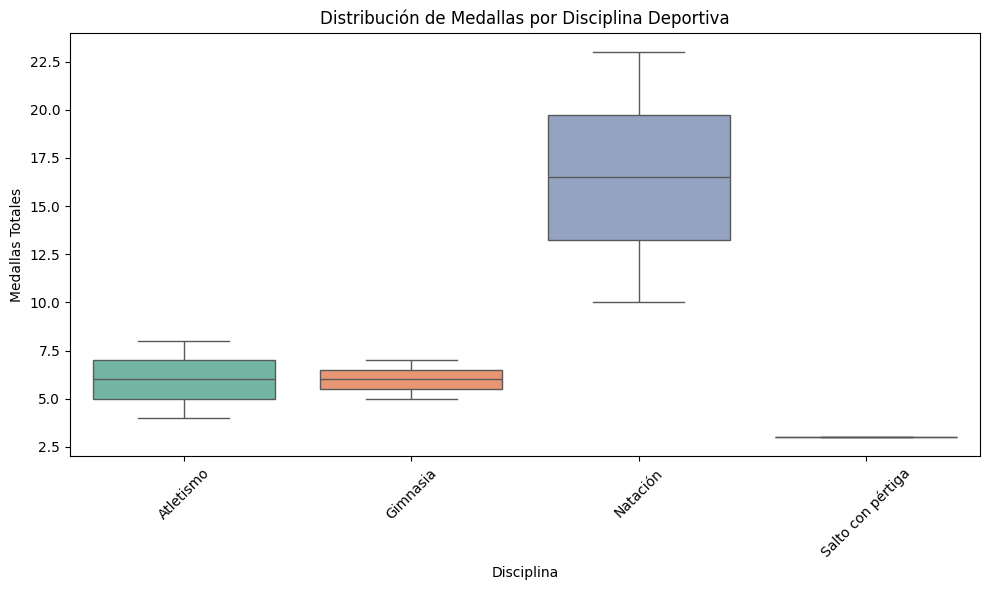

In [4]:
# 5. Visualización de Datos con Seaborn y Matplotlib 
# Crea un heatmap de correlación entre todas las variables numéricas.
# Crea un boxplot de la cantidad de medallas por disciplina deportiva.
# Personaliza los gráficos con títulos, etiquetas y colores.

# Heatmap de correlación entre variables numéricas
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Edad', 'Altura_cm', 'Peso_kg', 'Entrenamientos_Semanales', 'Medallas_Totales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='white')
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

# Boxplot de medallas por disciplina deportiva
plt.figure(figsize=(10, 6))
sns.boxplot(x='Deporte', y='Medallas_Totales', data=df, palette='Set2')
plt.title('Distribución de Medallas por Disciplina Deportiva')
plt.xlabel('Disciplina')
plt.ylabel('Medallas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

